In [37]:
import models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
media = models.load_media()

<Axes: >

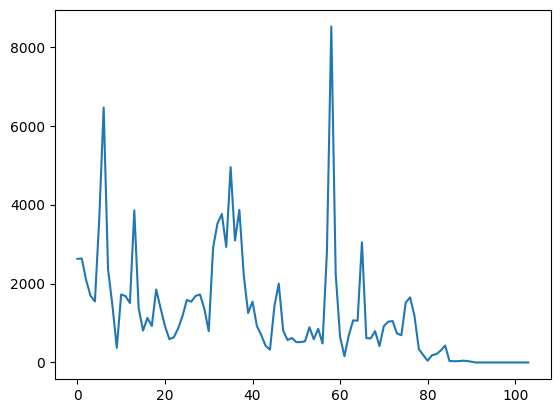

In [33]:
media.head()
spend_channel = media['spend_channel_1']
# plot the spend channel
spend_channel.plot()

In [105]:
def shift_numpy_array(arr, lag):
    if lag <= 0:
        return arr
    # Create an array of zeros with length `lag`
    lag_zeros = np.zeros(lag)
    # Concatenate the lag zeros with the truncated original array
    shifted_arr = np.concatenate((lag_zeros, arr[:-lag]))
    
    return shifted_arr

# geometric decay
def adstock_shifted(series, decay_rate, retention_length, shift):
    result = np.zeros(len(series))
    shifted_series = shift_numpy_array(series, shift)
    for i in range(1, len(series)):
        retention_values = np.array([shifted_series[j] for j in range(max(1, i - retention_length+1), i+1)])
        # retention_weights_delayed = np.array([decay_rate**((i-lag)**2) for i in range(min(i, retention_length))])[::-1]
        retention_weights = np.array([decay_rate**i for i in range(min(i, retention_length))])[::-1]
        result[i] = np.sum(retention_values * retention_weights)
    return result

104
104


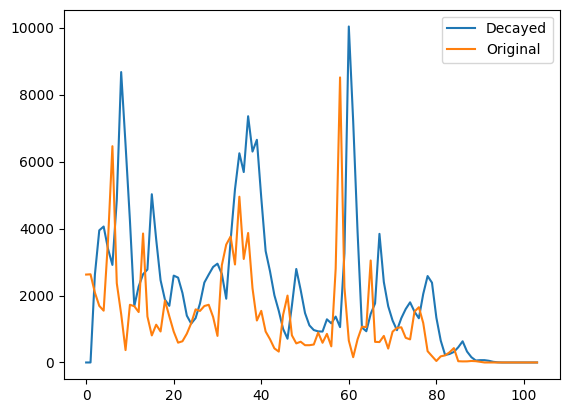

In [114]:
decayed_channel = adstock_shifted(spend_channel, 0.5, 3, 2)
# plot the decayed channel

plt.plot(decayed_channel)
plt.plot(spend_channel)
plt.legend(['Decayed', 'Original'])
plt.show()

22
22
22
22


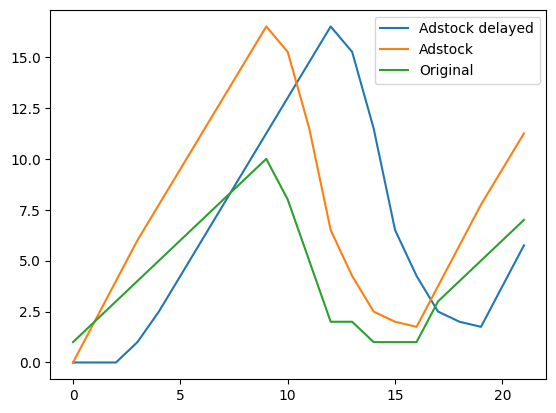

In [108]:
series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 8, 5, 2,2,1,1,1,3,4,5,6,7])
adstock_series = adstock_shifted(series, 0.5, 3, 0)
ad_stock_series_lag = adstock_shifted(series, 0.5, 3, 3)

plt.plot(ad_stock_series_lag)
plt.plot(adstock_series)
plt.plot(series)
plt.legend(['Adstock delayed','Adstock', 'Original'])
plt.show()
